In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from joblib import load, dump

In [2]:
# If using google colab, run this cell
# pip install --upgrade category_encoders

In [3]:
# If using google colab, run this cell
# pip install --upgrade eli5

In [4]:
from functools import reduce

df1 = pd.read_csv('https://raw.githubusercontent.com/xander-bennett/San-Diego-Police-Data/master/San%20Diego%20Police%20Data/Data/ripa_stops_datasd.csv',sep=',')
df2 = pd.read_csv('https://raw.githubusercontent.com/xander-bennett/San-Diego-Police-Data/master/San%20Diego%20Police%20Data/Data/ripa_stop_reason_datasd.csv',sep=',')
df3 = pd.read_csv('https://raw.githubusercontent.com/xander-bennett/San-Diego-Police-Data/master/San%20Diego%20Police%20Data/Data/ripa_race_datasd.csv',sep=',')
df4 = pd.read_csv('https://raw.githubusercontent.com/xander-bennett/San-Diego-Police-Data/master/San%20Diego%20Police%20Data/Data/ripa_stop_result_datasd.csv',sep=',')
df5 = pd.read_csv('https://raw.githubusercontent.com/xander-bennett/San-Diego-Police-Data/master/San%20Diego%20Police%20Data/Data/ripa_actions_taken_datasd.csv',sep=',')

//anaconda3/envs/DSEnv/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
//anaconda3/envs/DSEnv/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
df2.head()

,stop_id,pid,reason_for_stop,reason_for_stopcode,reason_for_stop_code_text,reason_for_stop_detail,reason_for_stop_explanation
0,2443,1,Reasonable Suspicion,64005,647(F) PC - DISORD CONDUCT:ALCOHOL (M) 64005,Officer witnessed commission of a crime,"staggering, unable to safely walk"
1,2444,1,Traffic Violation,54106,22350 VC - UNSAFE SPEED:PREVAIL COND (I) 54106,Moving Violation,Speeding
2,2447,1,Reasonable Suspicion,53072,415(1) PC - FIGHT IN PUBLIC PLACE (M) 53072,Matched suspect description,Both parties involved in argument.
3,2447,2,Reasonable Suspicion,53072,415(1) PC - FIGHT IN PUBLIC PLACE (M) 53072,Other Reasonable Suspicion of a crime,Both parties engaged in argument.
4,2448,1,Traffic Violation,54106,22350 VC - UNSAFE SPEED:PREVAIL COND (I) 54106,Moving Violation,UNSAFE DRIVING


df1.head()

In [6]:
# Merge dataframes
df_merged_1 = pd.merge(df1, df2, how='inner')
df_merged_2 = pd.merge(df3, df4, how='inner')
df_merged_3= pd.merge(df_merged_1, df_merged_2, how='inner')
df = pd.merge(df_merged_3, df5, how='inner')

print(df.shape)
df.head()

(321815, 41)


,stop_id,ori,agency,exp_years,stopdate,stoptime,stopduration,stop_in_response_to_cfs,officer_assignment_key,assignment,...,reason_for_stop_code_text,reason_for_stop_detail,reason_for_stop_explanation,race,resultkey,result,code,resulttext,action,consented
0,2443,CA0371100,SD,10,2018-07-01,00:01:37,30,0,1,"Patrol, traffic enforcement, field operations",...,647(F) PC - DISORD CONDUCT:ALCOHOL (M) 64005,Officer witnessed commission of a crime,"staggering, unable to safely walk",White,6,Custodial Arrest without warrant,64005.0,647(F) PC - DISORD CONDUCT:ALCOHOL (M) 64005,None,NaN
1,2444,CA0371100,SD,18,2018-07-01,00:03:34,10,0,1,"Patrol, traffic enforcement, field operations",...,22350 VC - UNSAFE SPEED:PREVAIL COND (I) 54106,Moving Violation,Speeding,White,2,Warning (verbal or written),54395.0,22349(B) VC - EXC 55MPH SPEED:2 LANE RD (I) 54395,None,NaN
2,2447,CA0371100,SD,1,2018-07-01,00:05:43,15,1,10,Other,...,415(1) PC - FIGHT IN PUBLIC PLACE (M) 53072,Matched suspect description,Both parties involved in argument.,Hispanic/Latino/a,1,No Action,NaN,NaN,Curbside detention,NaN
3,2447,CA0371100,SD,1,2018-07-01,00:05:43,15,1,10,Other,...,415(1) PC - FIGHT IN PUBLIC PLACE (M) 53072,Other Reasonable Suspicion of a crime,Both parties engaged in argument.,Hispanic/Latino/a,1,No Action,NaN,NaN,Curbside detention,NaN
4,2448,CA0371100,SD,3,2018-07-01,00:19:06,5,0,1,"Patrol, traffic enforcement, field operations",...,22350 VC - UNSAFE SPEED:PREVAIL COND (I) 54106,Moving Violation,UNSAFE DRIVING,White,1,No Action,NaN,NaN,None,NaN


In [7]:
cols = df.columns.tolist()
cols

['stop_id',
 'ori',
 'agency',
 'exp_years',
 'stopdate',
 'stoptime',
 'stopduration',
 'stop_in_response_to_cfs',
 'officer_assignment_key',
 'assignment',
 'intersection',
 'block',
 'land_mark',
 'street',
 'highway_exit',
 'isschool',
 'school_name',
 'cityname',
 'beat',
 'beat_name',
 'pid',
 'isstudent',
 'perceived_limited_english',
 'perceived_age',
 'perceived_gender',
 'gender_nonconforming',
 'gend',
 'gend_nc',
 'perceived_lgbt',
 'reason_for_stop',
 'reason_for_stopcode',
 'reason_for_stop_code_text',
 'reason_for_stop_detail',
 'reason_for_stop_explanation',
 'race',
 'resultkey',
 'result',
 'code',
 'resulttext',
 'action',
 'consented']

In [8]:
# dropping columns for missing values, constant values, etc.
df = df.drop(['agency', 'ori', 'block', 'gend_nc', 
         'highway_exit', 'intersection', 'land_mark',
         'school_name', 'street', 'gender_nonconforming', 
              'pid', 'consented', 'resulttext', 'code',
              'beat', 'resultkey','reason_for_stopcode', 
              'isschool', 'stop_id', 'isstudent','reason_for_stop_code_text',
             'reason_for_stop_explanation','cityname',
             'perceived_gender'], axis=1)
df.shape

(321815, 17)

In [9]:
# Testing to filter for stops that gave a ticket
# gender - 1 is for a male, 2 is for female
mask = (df['result'] == 'Citation for infraction')
print(df[mask].shape)
df[mask].head()

(46469, 17)


,exp_years,stopdate,stoptime,stopduration,stop_in_response_to_cfs,officer_assignment_key,assignment,beat_name,perceived_limited_english,perceived_age,gend,perceived_lgbt,reason_for_stop,reason_for_stop_detail,race,result,action
25,1,2018-07-01,01:03:00,15,0,1,"Patrol, traffic enforcement, field operations",Pacific Beach 122,0,35,1,No,Traffic Violation,Moving Violation,Middle Eastern or South Asian,Citation for infraction,None
33,2,2018-07-01,01:52:51,12,0,1,"Patrol, traffic enforcement, field operations",La Jolla 124,0,20,1,No,Traffic Violation,Moving Violation,White,Citation for infraction,None
93,1,2018-07-01,05:00:49,20,0,1,"Patrol, traffic enforcement, field operations",Sorrento Valley 931,0,22,2,No,Traffic Violation,Equipment Violation,Asian,Citation for infraction,None
95,10,2018-07-01,05:29:26,15,0,1,"Patrol, traffic enforcement, field operations",Pacific Beach 122,0,21,1,No,Reasonable Suspicion,Officer witnessed commission of a crime,White,Citation for infraction,Curbside detention
109,1,2018-07-01,05:42:21,83,0,1,"Patrol, traffic enforcement, field operations",Golden Hill 517,0,55,1,No,Traffic Violation,"Non-moving Violation, including Registration V...",White,Citation for infraction,Vehicle impounded


In [10]:
test = df[mask]
test.head()

,exp_years,stopdate,stoptime,stopduration,stop_in_response_to_cfs,officer_assignment_key,assignment,beat_name,perceived_limited_english,perceived_age,gend,perceived_lgbt,reason_for_stop,reason_for_stop_detail,race,result,action
25,1,2018-07-01,01:03:00,15,0,1,"Patrol, traffic enforcement, field operations",Pacific Beach 122,0,35,1,No,Traffic Violation,Moving Violation,Middle Eastern or South Asian,Citation for infraction,None
33,2,2018-07-01,01:52:51,12,0,1,"Patrol, traffic enforcement, field operations",La Jolla 124,0,20,1,No,Traffic Violation,Moving Violation,White,Citation for infraction,None
93,1,2018-07-01,05:00:49,20,0,1,"Patrol, traffic enforcement, field operations",Sorrento Valley 931,0,22,2,No,Traffic Violation,Equipment Violation,Asian,Citation for infraction,None
95,10,2018-07-01,05:29:26,15,0,1,"Patrol, traffic enforcement, field operations",Pacific Beach 122,0,21,1,No,Reasonable Suspicion,Officer witnessed commission of a crime,White,Citation for infraction,Curbside detention
109,1,2018-07-01,05:42:21,83,0,1,"Patrol, traffic enforcement, field operations",Golden Hill 517,0,55,1,No,Traffic Violation,"Non-moving Violation, including Registration V...",White,Citation for infraction,Vehicle impounded


In [11]:
# Narrowing result columns to ticket or non-ticket actions
list = ['No Action','Warning (verbal or written)', 'Citation for infraction']
test = df[df.result.isin(list)]
test.shape

(114768, 17)

In [12]:
# Confirming that only ticketed and non-ticketed stops are included
test.result.value_counts()

Citation for infraction        46469
Warning (verbal or written)    36003
No Action                      32296
Name: result, dtype: int64

In [13]:
# Applying to df
df = df[df.result.isin(list)]
df.shape

(114768, 17)

In [14]:
df.head()

,exp_years,stopdate,stoptime,stopduration,stop_in_response_to_cfs,officer_assignment_key,assignment,beat_name,perceived_limited_english,perceived_age,gend,perceived_lgbt,reason_for_stop,reason_for_stop_detail,race,result,action
1,18,2018-07-01,00:03:34,10,0,1,"Patrol, traffic enforcement, field operations",Mission Beach 121,0,25,1,No,Traffic Violation,Moving Violation,White,Warning (verbal or written),None
2,1,2018-07-01,00:05:43,15,1,10,Other,El Cerrito 822,0,30,1,No,Reasonable Suspicion,Matched suspect description,Hispanic/Latino/a,No Action,Curbside detention
3,1,2018-07-01,00:05:43,15,1,10,Other,El Cerrito 822,0,30,2,No,Reasonable Suspicion,Other Reasonable Suspicion of a crime,Hispanic/Latino/a,No Action,Curbside detention
4,3,2018-07-01,00:19:06,5,0,1,"Patrol, traffic enforcement, field operations",Ocean Beach 614,0,23,1,No,Traffic Violation,Moving Violation,White,No Action,None
16,4,2018-07-01,00:33:19,3,0,2,Gang enforcement,Colina Del Sol 826,0,30,1,No,Traffic Violation,"Non-moving Violation, including Registration V...",Black/African American,No Action,None


# Feature Engineering

In [15]:
# Engineering month, year features
df.stopdate = pd.to_datetime(df.stopdate, infer_datetime_format=True)
df['month'] = df.stopdate.dt.month
df['year'] = df.stopdate.dt.year
df['day'] = df.stopdate.dt.day

df = df.drop(columns='stopdate')
df.head()

,exp_years,stoptime,stopduration,stop_in_response_to_cfs,officer_assignment_key,assignment,beat_name,perceived_limited_english,perceived_age,gend,perceived_lgbt,reason_for_stop,reason_for_stop_detail,race,result,action,month,year,day
1,18,00:03:34,10,0,1,"Patrol, traffic enforcement, field operations",Mission Beach 121,0,25,1,No,Traffic Violation,Moving Violation,White,Warning (verbal or written),None,7,2018,1
2,1,00:05:43,15,1,10,Other,El Cerrito 822,0,30,1,No,Reasonable Suspicion,Matched suspect description,Hispanic/Latino/a,No Action,Curbside detention,7,2018,1
3,1,00:05:43,15,1,10,Other,El Cerrito 822,0,30,2,No,Reasonable Suspicion,Other Reasonable Suspicion of a crime,Hispanic/Latino/a,No Action,Curbside detention,7,2018,1
4,3,00:19:06,5,0,1,"Patrol, traffic enforcement, field operations",Ocean Beach 614,0,23,1,No,Traffic Violation,Moving Violation,White,No Action,None,7,2018,1
16,4,00:33:19,3,0,2,Gang enforcement,Colina Del Sol 826,0,30,1,No,Traffic Violation,"Non-moving Violation, including Registration V...",Black/African American,No Action,None,7,2018,1


In [16]:
# Creating ticket column
# df['ticket'] = df['result'] == 'Citation for infraction'
# df['no_ticket'] = df['result'] != 'Citation for infraction'
# df.head()

In [17]:
# Only including clean data rows from stoptime. This removes 28 rows
df = df[df['stoptime'].str.len()<=8]

In [18]:
# Now binning stoptimes by hour of the day. 0-24
df['stop_hour'] = pd.to_datetime(df['stoptime']).dt.hour
df = df.drop(columns='stoptime')
df.stop_hour.head()

1     0
2     0
3     0
4     0
16    0
Name: stop_hour, dtype: int64

In [19]:
df.stop_hour.dtype

dtype('int64')

In [20]:
# Further binning stop_hour into chunks of time. Conventionally, i think more tickets will happen at odd hours
# (Like 2 in the morning or something)
df['morning'] = (df['stop_hour'] < 12) & (df['stop_hour'] >= 6)
df['afternoon'] = (df['stop_hour'] >= 12) & (df['stop_hour'] < 19)
df['night'] = (df['stop_hour'] >= 19) | (df['stop_hour'] < 6) | (df['stop_hour'] == 0)

df.head()

,exp_years,stopduration,stop_in_response_to_cfs,officer_assignment_key,assignment,beat_name,perceived_limited_english,perceived_age,gend,perceived_lgbt,...,race,result,action,month,year,day,stop_hour,morning,afternoon,night
1,18,10,0,1,"Patrol, traffic enforcement, field operations",Mission Beach 121,0,25,1,No,...,White,Warning (verbal or written),None,7,2018,1,0,False,False,True
2,1,15,1,10,Other,El Cerrito 822,0,30,1,No,...,Hispanic/Latino/a,No Action,Curbside detention,7,2018,1,0,False,False,True
3,1,15,1,10,Other,El Cerrito 822,0,30,2,No,...,Hispanic/Latino/a,No Action,Curbside detention,7,2018,1,0,False,False,True
4,3,5,0,1,"Patrol, traffic enforcement, field operations",Ocean Beach 614,0,23,1,No,...,White,No Action,None,7,2018,1,0,False,False,True
16,4,3,0,2,Gang enforcement,Colina Del Sol 826,0,30,1,No,...,Black/African American,No Action,None,7,2018,1,0,False,False,True


# Create train, val, test dataframes

In [21]:
# get features and target

target = 'result'

features = df.columns.drop('result')

In [22]:
features

Index(['exp_years', 'stopduration', 'stop_in_response_to_cfs',
       'officer_assignment_key', 'assignment', 'beat_name',
       'perceived_limited_english', 'perceived_age', 'gend', 'perceived_lgbt',
       'reason_for_stop', 'reason_for_stop_detail', 'race', 'action', 'month',
       'year', 'day', 'stop_hour', 'morning', 'afternoon', 'night'],
      dtype='object')

In [23]:
df.shape

(114767, 22)

In [24]:
df.isnull().sum()

exp_years                       0
stopduration                    0
stop_in_response_to_cfs         0
officer_assignment_key          0
assignment                      0
beat_name                       0
perceived_limited_english       0
perceived_age                   0
gend                            0
perceived_lgbt                  0
reason_for_stop                 0
reason_for_stop_detail       5501
race                            0
result                          0
action                          0
month                           0
year                            0
day                             0
stop_hour                       0
morning                         0
afternoon                       0
night                           0
dtype: int64

In [25]:
df = df.dropna()
df.isnull().sum()

exp_years                    0
stopduration                 0
stop_in_response_to_cfs      0
officer_assignment_key       0
assignment                   0
beat_name                    0
perceived_limited_english    0
perceived_age                0
gend                         0
perceived_lgbt               0
reason_for_stop              0
reason_for_stop_detail       0
race                         0
result                       0
action                       0
month                        0
year                         0
day                          0
stop_hour                    0
morning                      0
afternoon                    0
night                        0
dtype: int64

In [26]:
train = df
train.shape

(109266, 22)

In [27]:
from sklearn.model_selection import train_test_split

# Split train into train & test, then will split train again into train and val
train, test = train_test_split(train, train_size=0.80, test_size=0.20, 
                              stratify=train[target], random_state=42)
train.shape, test.shape

((87412, 22), (21854, 22))

In [28]:
# Split train into train & val
train, val = train_test_split(train, train_size=0.80, test_size=0.20, 
                              stratify=train['result'], random_state=42)
train.shape,val.shape,test.shape

((69929, 22), (17483, 22), (21854, 22))

In [29]:
# The app has a max of 100 MB. so going make a smaller data set for the app to make predictions on.
# The notebook will still make predictions on the full data set, there will just be a separate dataset for the app.
app_train, app_val = train_test_split(train, train_size=50000, test_size=18363, 
                              stratify=train['result'], random_state=42)
train.shape,val.shape,test.shape, app_train.shape, app_val.shape

((69929, 22), (17483, 22), (21854, 22), (50000, 22), (18363, 22))

In [30]:
# Arrange data into X features matrix and y target vector
target = 'result'
X_train = train.drop(columns=target)
y_train = train[target]
X_val = val.drop(columns=target)
y_val = val[target]
X_test = test.drop(columns=target)
y_test = test[target]

# And for the app data
app_train_X = app_train.drop(columns=target)
app_train_y = app_train[target]
app_val_X = app_val.drop(columns=target)
app_val_y = app_val[target]
# Check shapes
print('X_train shape', X_train.shape)
print('y_train shape', y_train.shape)
print('X_val shape', X_val.shape)
print('y_val shape', y_val.shape)
print('X_test shape', X_test.shape)
print('y_test shape', y_test.shape)
print('app_train_X shape', app_train_X.shape)
print('app_train_y shape', app_train_y.shape)
print('app_val_X shape', app_val_X.shape)
print('app_val_y shape', app_val_y.shape)

X_train shape (69929, 21)
y_train shape (69929,)
X_val shape (17483, 21)
y_val shape (17483,)
X_test shape (21854, 21)
y_test shape (21854,)
app_train_X shape (50000, 21)
app_train_y shape (50000,)
app_val_X shape (18363, 21)
app_val_y shape (18363,)


# Get accuracy score for majority baseline

In [31]:
# Get accuracy score for majority class baseline
y_train.value_counts(normalize=True)

Citation for infraction        0.419869
Warning (verbal or written)    0.324629
No Action                      0.255502
Name: result, dtype: float64

In [32]:
import numpy as np
from sklearn.metrics import accuracy_score

majority_class = y_train.mode()[0]
y_pred = np.full_like(y_val, fill_value=majority_class)
accuracy_score(y_val, y_pred)

0.4198364125150146

# Create Model - Random Forest

In [33]:
import category_encoders as ce
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline

# Instantiate the class
pipeline = make_pipeline(
    ce.OrdinalEncoder(),
    RandomForestClassifier(n_estimators=1000, n_jobs=-1, random_state=42, max_depth=20)
)
# Fit on training set, test on val set
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_val)
print('Validation Accuracy', accuracy_score(y_val, y_pred))

# Now predicting on test
y_pred = pipeline.predict(X_test)
print('Test Accuracy', accuracy_score(y_test, y_pred))

Validation Accuracy 0.7345993250586283
Test Accuracy 0.7411457856685275


In [34]:
y_pred = pipeline.predict(X_test)
print('Test Accuracy', accuracy_score(y_test, y_pred))

Test Accuracy 0.7411457856685275


In [35]:
# This forest is for the app
import category_encoders as ce
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline

app_pipeline = make_pipeline(
    ce.OrdinalEncoder(),
    RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=42, max_depth=20)
)

pipeline.fit(app_train_X, app_train_y)
app_y_pred = pipeline.predict(app_val_X)
print('Validation Accuracy', accuracy_score(app_val_y, app_y_pred))

Validation Accuracy 0.7294559712465284


In [36]:
# Pickling pipeline
from joblib import dump
dump(pipeline, 'pipeline.joblib1', compress=True)

['pipeline.joblib1']

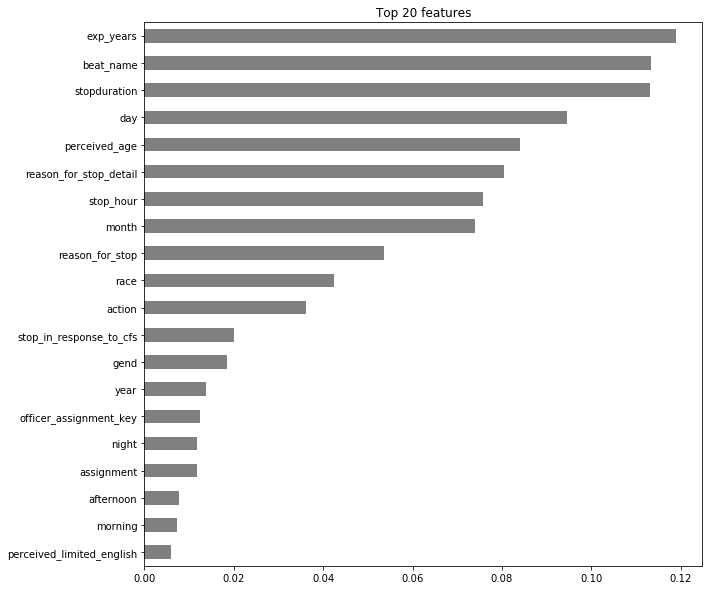

In [37]:
# Get feature importances
rf = pipeline.named_steps['randomforestclassifier']
importances = pd.Series(rf.feature_importances_, X_train.columns)

%matplotlib inline
import matplotlib.pyplot as plt

n=20
plt.figure(figsize=(10, n/2))
plt.title(f'Top {n} features')
importances.sort_values()[-n:].plot.barh(color='grey');

In [38]:
# Going to get permutation importance


# eli5 doesn't work well with pipelines, so need to decosntruct a little bit for it to work
transformers = make_pipeline(
    ce.OrdinalEncoder(), 
)

X_train_transformed = transformers.fit_transform(X_train)
X_val_transformed = transformers.transform(X_val)

model = RandomForestClassifier(n_estimators=500, random_state=42, n_jobs=-1)
model.fit(X_train_transformed, y_train)

# Going to instantiate the permuter class to get the permutation importance
import eli5
from eli5.sklearn import PermutationImportance

permuter = PermutationImportance(
    model,
    scoring='accuracy', 
    n_iter=2, 
    random_state=42
)

permuter.fit(X_val_transformed, y_val)
feature_names = X_val.columns.tolist()

eli5.show_weights(
    permuter, 
    top=None, # show permutation importances for all features
    feature_names=feature_names
)

Weight,Feature
0.2001 ± 0.0010,reason_for_stop
0.1219 ± 0.0006,exp_years
0.1116 ± 0.0035,stopduration
0.0904 ± 0.0009,reason_for_stop_detail
0.0582 ± 0.0002,beat_name
0.0361 ± 0.0021,month
0.0296 ± 0.0013,action
0.0264 ± 0.0011,stop_hour
0.0239 ± 0.0001,day
0.0179 ± 0.0013,perceived_age


In [39]:
print('Shape before removing features:', X_train.shape)

Shape before removing features: (69929, 21)


In [40]:
minimum_importance = 0
mask = permuter.feature_importances_ > minimum_importance
features = X_train.columns[mask]
X_train = X_train[features]

print('Shape after removing features:', X_train.shape)

Shape after removing features: (69929, 21)


In [41]:
X_val = X_val[features]

In [42]:
from sklearn.impute import SimpleImputer
pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='median'), 
    RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
)

# Fit on train, score on val
pipeline.fit(X_train, y_train)
print('Validation Accuracy', pipeline.score(X_val, y_val))

Validation Accuracy 0.7415203340387805


# ROC AUC

In [43]:
%%time
import category_encoders as ce
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline

pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='median'), 
    RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=42)
)

pipeline.fit(X_train, y_train);

CPU times: user 12.8 s, sys: 471 ms, total: 13.3 s
Wall time: 4.04 s


Pipeline(memory=None,
         steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['assignment', 'beat_name',
                                      'perceived_lgbt', 'reason_for_stop',
                                      'reason_for_stop_detail', 'race',
                                      'action'],
                                drop_invariant=False, handle_missing='value',
                                handle_unknown='value',
                                mapping=[{'col': 'assignment',
                                          'data_type': dtype('O'),
                                          'mapping': Patrol, traffic enforcement, field operations                                      1
Gang enforc...
                ('randomforestclassifier',
                 RandomForestClassifier(bootstrap=True, class_weight=None,
                                        criterion='gini', max_depth=None,
                                        max_features='auto',
            

In [44]:
#  get accuracy score for model
y_pred = pipeline.predict(X_val)
accuracy_score(y_val, y_pred)

0.7415203340387805

In [45]:
# define confusion matrix function
%matplotlib inline
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

def plot_confusion_matrix(y_true, y_pred):
    labels = unique_labels(y_true)
    columns = [f'Predicted {label}' for label in labels]
    index = [f'Actual {label}' for label in labels]
    table = pd.DataFrame(confusion_matrix(y_true, y_pred), 
                         columns=columns, index=index)
    return sns.heatmap(table, annot=True, fmt='d', cmap='viridis')

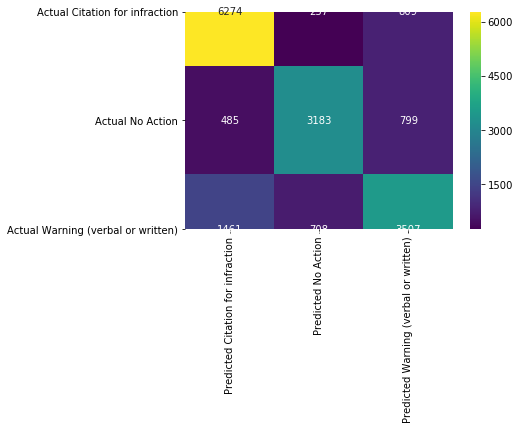

In [46]:
plot_confusion_matrix(y_val, y_pred);

In [47]:
# get precision and recall
from sklearn.metrics import classification_report
print(classification_report(y_val, y_pred))

                             precision    recall  f1-score   support

    Citation for infraction       0.76      0.85      0.81      7340
                  No Action       0.77      0.71      0.74      4467
Warning (verbal or written)       0.69      0.62      0.65      5676

                   accuracy                           0.74     17483
                  macro avg       0.74      0.73      0.73     17483
               weighted avg       0.74      0.74      0.74     17483



In [48]:
# get ROC AUC score for model
from sklearn.metrics import roc_auc_score
y_pred_proba = pipeline.predict_proba(X_val)[:, 1]

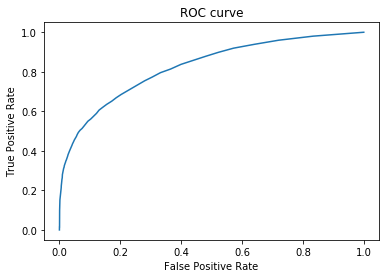

In [49]:
# Plot ROC curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
tpr, fpr, thresholds = roc_curve(y_val=='Citation for infraction', y_pred_proba)
plt.plot(fpr, tpr)
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate');

# Exploratory Visual analysis

In [50]:
df.exp_years.value_counts(normalize=True)

1     0.249099
2     0.104818
3     0.102539
4     0.090055
5     0.066260
10    0.058179
18    0.037294
9     0.026568
12    0.022898
14    0.021525
11    0.021471
30    0.019869
24    0.018048
6     0.017746
19    0.016327
20    0.015430
28    0.015293
8     0.013646
7     0.011248
15    0.010552
13    0.009939
23    0.009774
22    0.009088
16    0.007569
17    0.007358
25    0.004411
29    0.004128
21    0.003771
26    0.002901
27    0.001263
32    0.000421
31    0.000284
49    0.000082
33    0.000046
45    0.000046
34    0.000018
48    0.000018
36    0.000009
50    0.000009
Name: exp_years, dtype: float64

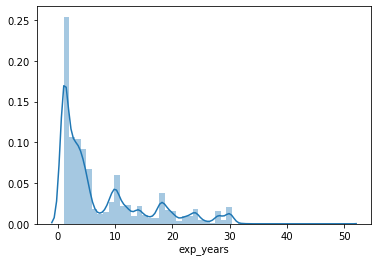

In [51]:
import seaborn as sns
sns.distplot(df.exp_years);

In [52]:
df.action

1                                         None
2                           Curbside detention
3                           Curbside detention
4                                         None
16                                        None
19                                        None
25                                        None
29                                        None
30                                        None
33                                        None
46                   Handcuffed or flex cuffed
47        Person removed from vehicle by order
68                                        None
79                                        None
80                         Chemical spray used
81                                        None
82                                        None
85                          Curbside detention
88                                        None
91                                        None
92                                        None
93           

In [53]:
df_ticket = df[df['result'] == 'Citation for infraction']

In [54]:
df_no_ticket = df[df['result'] != 'Citation for infraction']

16    0.076467
15    0.068598
8     0.066680
17    0.063911
9     0.062952
10    0.058745
18    0.057154
19    0.050179
14    0.049329
13    0.047410
12    0.046691
7     0.046495
11    0.043901
22    0.042964
21    0.042201
23    0.036729
20    0.036293
0     0.025373
1     0.017983
6     0.017569
2     0.013711
5     0.012141
3     0.008719
4     0.007804
Name: stop_hour, dtype: float64


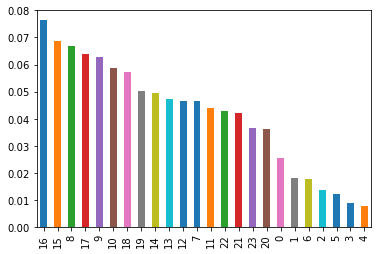

In [55]:
# Looks like three out of the five highest percentage time slots for getting a ticket are during the afternoon commute
# The third highest, though not in the afternoon, is during the morning commute. From 8-9AM
df_ticket['stop_hour'].value_counts(normalize=True).plot(kind='bar');
print(df_ticket['stop_hour'].value_counts(normalize=True))

22    0.070563
15    0.060372
16    0.055924
23    0.055498
17    0.051538
21    0.051033
8     0.050434
9     0.049424
18    0.047216
19    0.046869
0     0.046096
10    0.045607
20    0.044281
7     0.043288
11    0.040259
1     0.037829
12    0.036977
14    0.033712
13    0.033049
2     0.029169
3     0.022417
6     0.019009
4     0.016264
5     0.013172
Name: stop_hour, dtype: float64


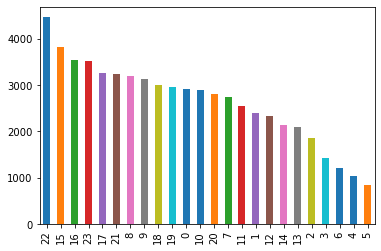

In [56]:
# it seems like the time of day when you're most likely to get off with just a warning or less would be at 10PM.
# Possible reasons could be that, it's too early for most people to be staggeringly drunk. That likelihood increases the later it gets
print(df_no_ticket['stop_hour'].value_counts(normalize=True))
df_no_ticket['stop_hour'].value_counts().plot(kind='bar');

1     0.282836
2     0.136693
3     0.129737
4     0.088232
5     0.078419
10    0.048557
9     0.025793
6     0.021155
11    0.019688
12    0.019325
18    0.015618
7     0.014829
8     0.012983
16    0.010790
20    0.009670
13    0.009339
24    0.008913
19    0.008613
14    0.008329
22    0.007257
15    0.006878
17    0.006578
28    0.005632
23    0.005364
30    0.004307
21    0.003549
26    0.003250
29    0.002871
25    0.002713
27    0.000962
32    0.000473
31    0.000331
49    0.000142
33    0.000047
45    0.000032
48    0.000032
34    0.000032
36    0.000016
50    0.000016
Name: exp_years, dtype: float64


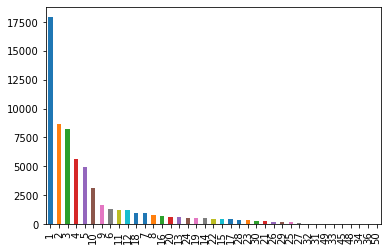

In [57]:
df_no_ticket['exp_years'].value_counts().plot(kind='bar');
print(df_no_ticket['exp_years'].value_counts(normalize=True))

1     0.202481
4     0.092576
10    0.071475
18    0.067246
3     0.064958
2     0.060773
5     0.049459
30    0.041372
14    0.039759
24    0.030670
28    0.028642
12    0.027836
9     0.027640
19    0.026986
11    0.023934
20    0.023389
23    0.015869
15    0.015629
8     0.014561
6     0.013035
22    0.011618
13    0.010768
17    0.008436
25    0.006757
7     0.006300
29    0.005864
21    0.004076
16    0.003117
26    0.002420
27    0.001678
32    0.000349
31    0.000218
45    0.000065
33    0.000044
Name: exp_years, dtype: float64


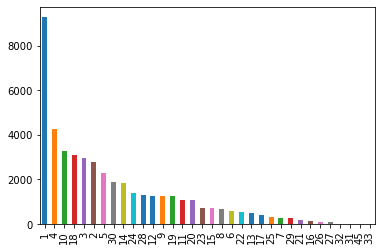

In [58]:
df_ticket['exp_years'].value_counts().plot(kind='bar');
print(df_ticket['exp_years'].value_counts(normalize=True))

In [59]:
print(df.exp_years.value_counts())
print(df_no_ticket.exp_years.value_counts())
print(df_ticket.exp_years.value_counts())

1     27218
2     11453
3     11204
4      9840
5      7240
10     6357
18     4075
9      2903
12     2502
14     2352
11     2346
30     2171
24     1972
6      1939
19     1784
20     1686
28     1671
8      1491
7      1229
15     1153
13     1086
23     1068
22      993
16      827
17      804
25      482
29      451
21      412
26      317
27      138
32       46
31       31
49        9
33        5
45        5
34        2
48        2
36        1
50        1
Name: exp_years, dtype: int64
1     17929
2      8665
3      8224
4      5593
5      4971
10     3078
9      1635
6      1341
11     1248
12     1225
18      990
7       940
8       823
16      684
20      613
13      592
24      565
19      546
14      528
22      460
15      436
17      417
28      357
23      340
30      273
21      225
26      206
29      182
25      172
27       61
32       30
31       21
49        9
33        3
45        2
48        2
34        2
36        1
50        1
Name: exp_years, dtype: int64
1   

In [60]:
9289 / (9289 + 17929)

0.3412815048864722

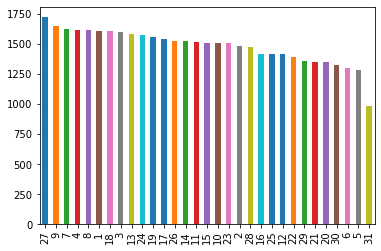

In [61]:
df_ticket['day'].value_counts().plot(kind='bar');

In [62]:
df_ticket['day'].value_counts(normalize=True)

27    0.037536
9     0.035967
7     0.035313
4     0.035116
8     0.035116
1     0.035029
18    0.034964
3     0.034811
13    0.034462
24    0.034266
19    0.033918
17    0.033547
26    0.033242
14    0.033198
11    0.032937
15    0.032893
10    0.032806
23    0.032784
2     0.032283
28    0.032152
16    0.030909
25    0.030909
12    0.030866
22    0.030321
29    0.029536
21    0.029384
20    0.029340
30    0.028751
6     0.028294
5     0.028010
31    0.021340
Name: day, dtype: float64

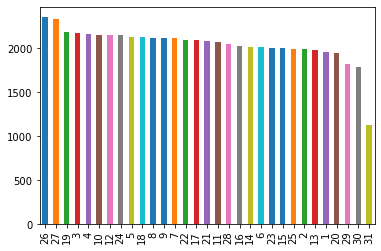

In [63]:
df_no_ticket['day'].value_counts().plot(kind='bar');

In [64]:
df_no_ticket['day'].value_counts()

26    2358
27    2340
19    2183
3     2178
4     2168
10    2156
12    2156
24    2153
5     2133
18    2127
8     2123
9     2116
7     2114
22    2101
17    2091
21    2085
11    2076
28    2054
16    2022
14    2017
6     2016
23    2010
15    2007
25    1990
2     1990
13    1983
1     1957
20    1953
29    1821
30    1784
31    1128
Name: day, dtype: int64

In [65]:
df_ticket.reason_for_stop_detail.value_counts(normalize=True)

Moving Violation                                            0.563083
Equipment Violation                                         0.161740
Officer witnessed commission of a crime                     0.155899
Non-moving Violation, including Registration Violation      0.058397
Other Reasonable Suspicion of a crime                       0.029384
Matched suspect description                                 0.015585
Witness or Victim identification of Suspect at the scene    0.013667
Carrying Suspicious Object                                  0.000719
Actions indicative of casing a victim or location           0.000654
Actions indicative of drug transaction                      0.000545
Actions indicative of engaging in violent crime             0.000174
Suspected of Acting as Lookout                              0.000153
Name: reason_for_stop_detail, dtype: float64

In [66]:
df_no_ticket.reason_for_stop_detail.value_counts(normalize=True)

Moving Violation                                                             0.276684
Equipment Violation                                                          0.202398
Matched suspect description                                                  0.177709
Officer witnessed commission of a crime                                      0.143919
Other Reasonable Suspicion of a crime                                        0.109607
Non-moving Violation, including Registration Violation                       0.047231
Witness or Victim identification of Suspect at the scene                     0.028538
Actions indicative of casing a victim or location                            0.004717
Actions indicative of drug transaction                                       0.003833
Carrying Suspicious Object                                                   0.002130
Actions indicative of engaging in violent crime                              0.001830
Suspected of Acting as Lookout                        

In [67]:
df_ticket['stopduration'].value_counts(normalize=True)

10      0.234000
5       0.146002
15      0.125926
20      0.078908
30      0.057939
8       0.053361
6       0.045231
7       0.042266
25      0.022692
12      0.022190
9       0.018049
60      0.015193
45      0.014517
40      0.013035
11      0.009264
13      0.008218
35      0.007760
14      0.007542
24      0.006103
4       0.005319
18      0.004752
50      0.003902
120     0.003836
17      0.003793
3       0.003727
16      0.003706
23      0.003488
300     0.002877
90      0.002834
2       0.002616
          ...   
330     0.000087
83      0.000065
66      0.000065
360     0.000044
153     0.000044
215     0.000044
85      0.000044
290     0.000044
145     0.000044
69      0.000044
74      0.000044
78      0.000022
171     0.000022
350     0.000022
125     0.000022
320     0.000022
713     0.000022
1400    0.000022
600     0.000022
102     0.000022
115     0.000022
270     0.000022
1419    0.000022
51      0.000022
210     0.000022
1351    0.000022
1200    0.000022
1422    0.0000

In [68]:
df_no_ticket['stopduration'].value_counts(normalize=True)

10      0.250686
5       0.175943
15      0.132971
20      0.096482
30      0.061666
8       0.026313
7       0.024499
6       0.023411
25      0.021628
3       0.020666
60      0.019703
2       0.018489
4       0.017384
45      0.013220
12      0.010948
40      0.009481
120     0.008361
9       0.006878
1       0.006436
35      0.004796
14      0.004165
13      0.003897
90      0.003802
11      0.003660
50      0.003234
18      0.002461
17      0.002224
16      0.002051
180     0.001783
22      0.001420
          ...   
442     0.000032
92      0.000032
380     0.000032
420     0.000032
125     0.000032
236     0.000032
1400    0.000032
440     0.000016
800     0.000016
480     0.000016
220     0.000016
318     0.000016
96      0.000016
350     0.000016
66      0.000016
599     0.000016
56      0.000016
201     0.000016
85      0.000016
53      0.000016
82      0.000016
49      0.000016
720     0.000016
430     0.000016
397     0.000016
76      0.000016
1030    0.000016
1350    0.0000